<a href="https://colab.research.google.com/github/reynoldsiburian/datastudying/blob/main/Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
import statsmodels.formula.api as smf
from scipy.special import expit, logit

This notebook is focused on providing insights on the following topics :

What is the most common diagnosis per age group?
Some doctors believe ejectin fraction and serum creatinie plays a role in mortality of heart failure. Explore the effect of a ejection fraction and serum creatinine on mortality

Hypotheses:
(H0): There is no relationship between ejection fraction, serum creatinine levels, and mortality in heart failure patients.
Alternative Hypothesis
(H1): There is a relationship between ejection fraction, serum creatinine levels, and mortality in heart failure patients.

In [4]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from
    :return df: <pandas DataFrame>
    """
    coef = results.params
    std_err = results.bse

    df = pd.DataFrame(data = np.transpose([coef, std_err]),
                      index = coef.index,
                      columns=["coef","std err"])
    return df

In [20]:
df = pd.read_csv('/content/drive/My Drive/heart_failure_clinical_records_dataset.csv')

In [6]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
df.isna().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [9]:
df.groupby('DEATH_EVENT')['ejection_fraction'].mean()

,ejection_fraction
DEATH_EVENT,
0,40.26601
1,33.46875


In [10]:
df.groupby('DEATH_EVENT')['serum_creatinine'].mean()

,serum_creatinine
DEATH_EVENT,
0,1.184877
1,1.835833


In [12]:
# ejection fraction in non-death
data_group1 = df[df['DEATH_EVENT']==0]['ejection_fraction'].values

# ejection fraction in non-death
data_group2 = df[df['DEATH_EVENT']==1]['ejection_fraction'].values

# variance
np.var(data_group1), np.var(data_group2)

(117.35781018709505, 155.2490234375)

In [13]:
from scipy import stats
result = stats.ttest_ind(a = data_group1,
                         b = data_group2,
                         equal_var=False,
                         alternative = "two-sided")

In [14]:
print (result.pvalue)
print (result.statistic)

9.647152798521775e-06
4.56698316342773


In [15]:
if result.pvalue<0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


In [16]:
#degrees of freedom
df_data = len(data_group1)+len(data_group2)-2
df_data

297

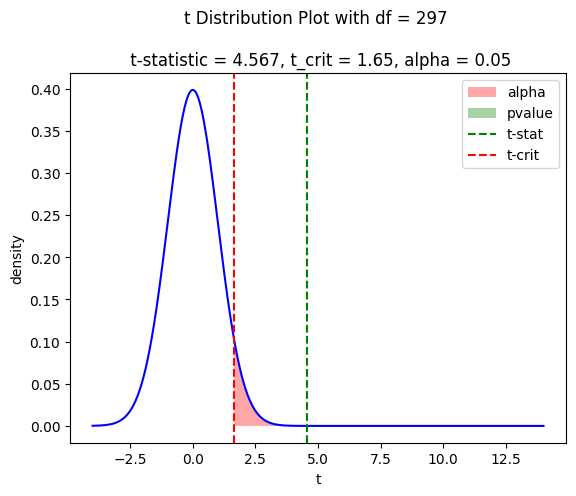

In [17]:
# plot sample distribution
x = np.arange(-4, 14, 0.001)
plt.plot(x, stats.t.pdf(x, df = df_data),
         color='blue')

# plot alpha region
x_alpha = np.arange(stats.t.ppf(1-0.05, df = df_data), 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, df = df_data)
plt.fill_between(x = x_alpha,
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35,
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(result.statistic, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, df = df_data)

plt.fill_between(x = x_pvalue,
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35,
                 label = 'pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(result.statistic, 4),
            color ="green",
            linestyle = "--",
            label ="t-stat")

t_crit = np.round(stats.t.ppf(1-0.05, df = df_data), 4)
plt.axvline(t_crit,
            color ="red",
            linestyle = "--",
            label ="t-crit")

plt.legend()
plt.xlabel("t")
plt.ylabel("density")


plt.title(f't Distribution Plot with df = {df_data} \n\n t-statistic = {np.round(result.statistic, 4)}, t_crit = {np.round(t_crit,4)}, alpha = 0.05');

In [22]:
# ejection fraction in non-death
data_creatinine1 = df[df['DEATH_EVENT']==0]['serum_creatinine'].values

# ejection fraction in non-death
data_creatinine2 = df[df['DEATH_EVENT']==1]['serum_creatinine'].values

# variance
np.var(data_creatinine1), np.var(data_creatinine2)

(0.42571661044917375, 2.134207638888889)

In [28]:
from scipy import stats
result2 = stats.ttest_ind(a = data_creatinine1,
                         b = data_creatinine2,
                         equal_var=False,
                         alternative = "two-sided")

In [29]:
print (result2.pvalue)
print (result2.statistic)

6.398962339971595e-05
-4.152639017521322


In [32]:
#degrees of freedom
df_data2 = len(data_creatinine1)+len(data_creatinine2)-2
df_data2

297

In [31]:
if result.pvalue<0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


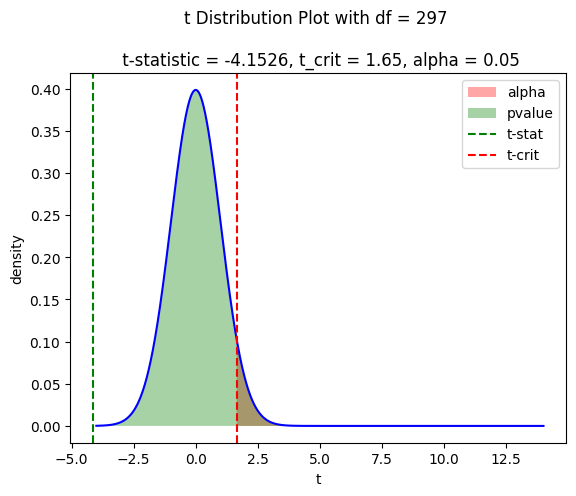

In [35]:
# plot sample distribution
x = np.arange(-4, 14, 0.001)
plt.plot(x, stats.t.pdf(x, df = df_data2),
         color='blue')

# plot alpha region
x_alpha = np.arange(stats.t.ppf(1-0.05, df = df_data2), 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, df = df_data2)
plt.fill_between(x = x_alpha,
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35,
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(result2.statistic, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, df = df_data2)

plt.fill_between(x = x_pvalue,
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35,
                 label = 'pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(result2.statistic, 4),
            color ="green",
            linestyle = "--",
            label ="t-stat")

t_crit = np.round(stats.t.ppf(1-0.05, df = df_data2), 4)
plt.axvline(t_crit,
            color ="red",
            linestyle = "--",
            label ="t-crit")

plt.legend()
plt.xlabel("t")
plt.ylabel("density")


plt.title(f't Distribution Plot with df = {df_data} \n\n t-statistic = {np.round(result2.statistic, 4)}, t_crit = {np.round(t_crit,4)}, alpha = 0.05');

In [18]:
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

cm = CompareMeans(d1 = DescrStatsW(data=data_group1),
                  d2 = DescrStatsW(data=data_group2))

lower, upper = cm.tconfint_diff(alpha=0.05,
                                alternative='two-sided',
                                usevar='unequal')

print("Confidence Interval", ":", "[", lower, upper, "]")

Confidence Interval : [ 3.8585663251983044 9.735953379235191 ]


based on the result we are 95% confident that the true difference in average ejection fraction between the group who survived and the group who died lies somewhere between 3.86 and 9.74.

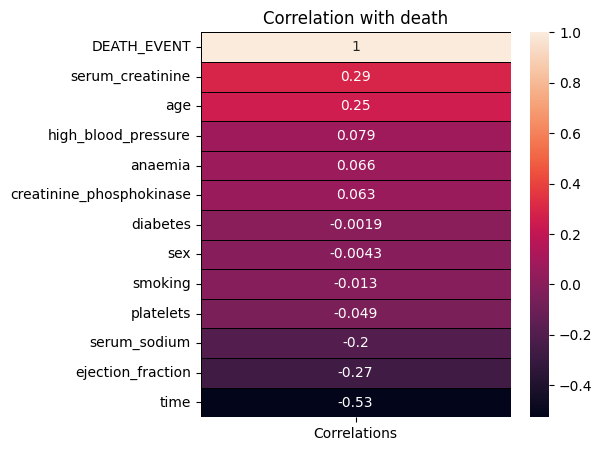

In [93]:
corr = df.corrwith(df['DEATH_EVENT']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation with death');

In [98]:
df['DEATH_EVENT'] = df['DEATH_EVENT'].replace({0: 'No', 1: 'Yes'})

The average of the ejection fraction from the non-smokers is 38.6
the difference between ejection fraction of smokers and non-smokers is -1.7

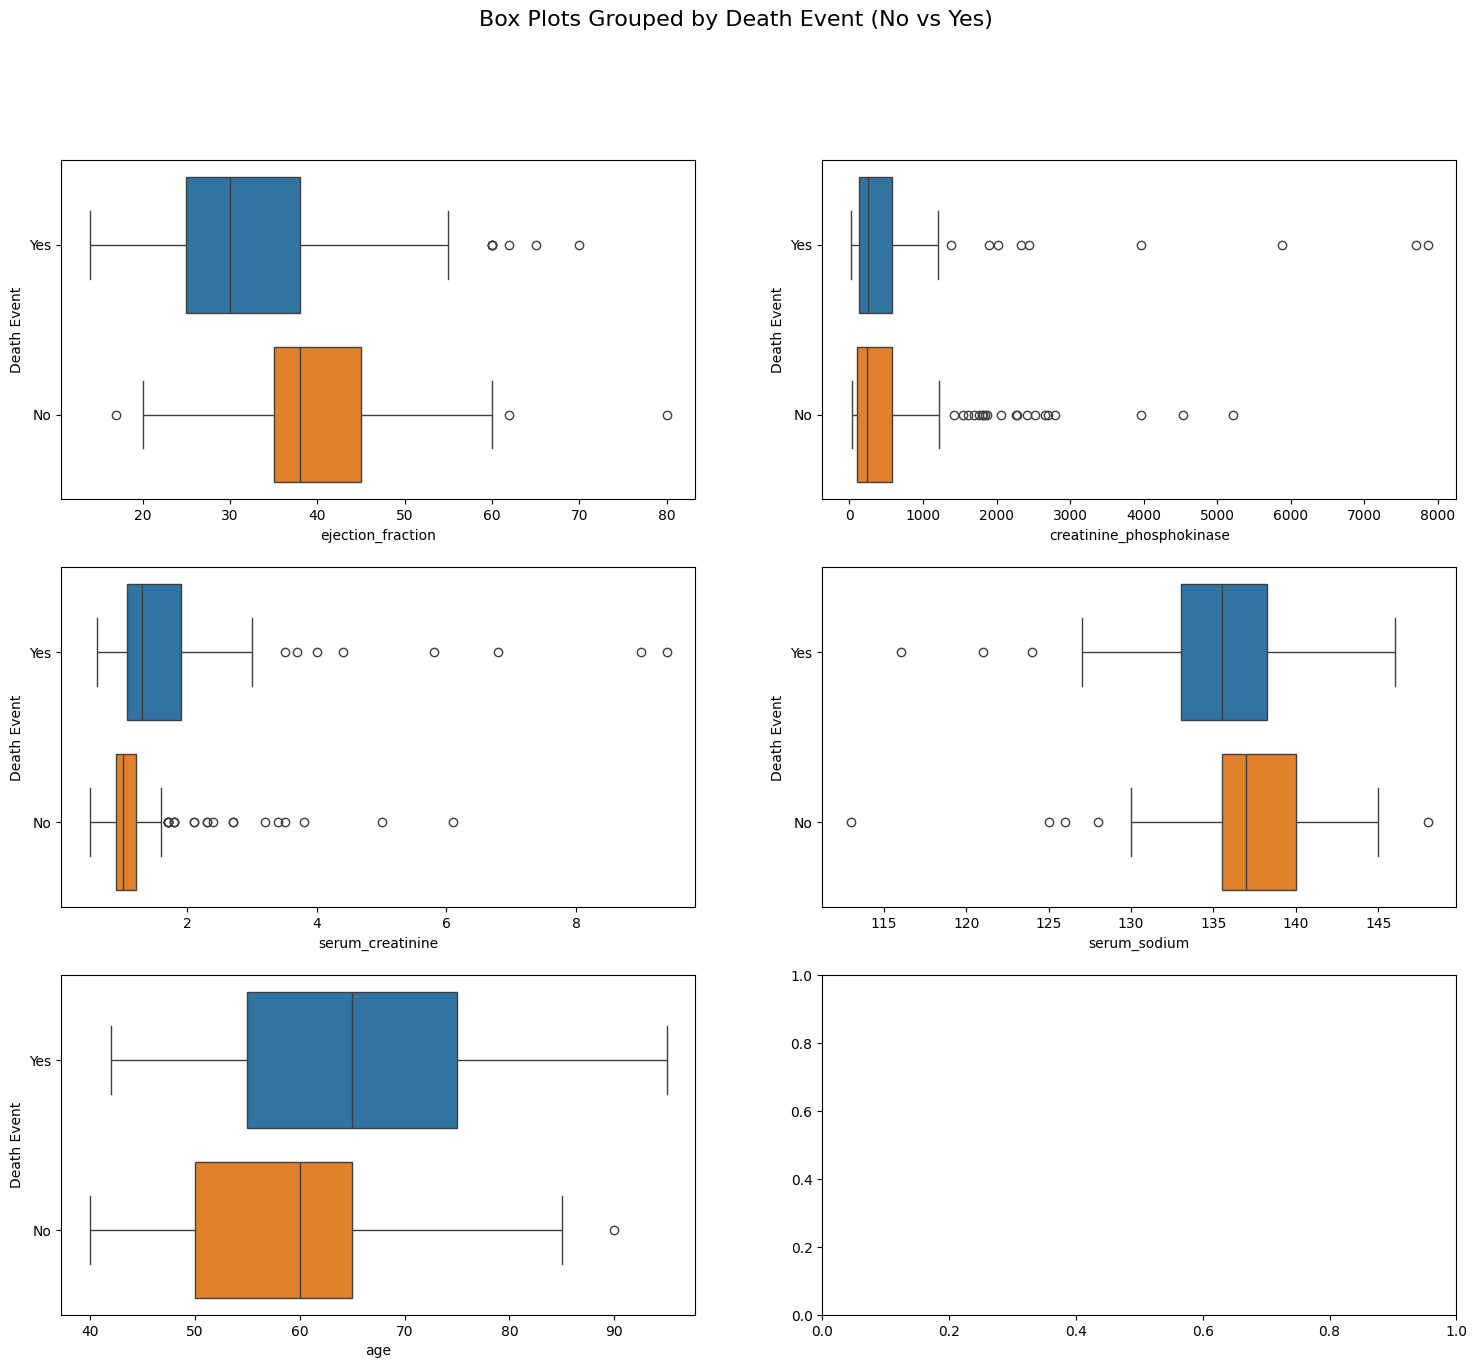

In [99]:
features = ['ejection_fraction', 'creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium', 'age']

fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('Box Plots Grouped by Death Event (No vs Yes)', fontsize=16)

# Iterating over the features to create boxplots in each subplot
for ax, feature in zip(axes.flatten(), features):
    sns.boxplot(y='DEATH_EVENT', x=feature, data=df, ax=ax, hue = 'DEATH_EVENT')
    ax.set_xlabel(feature)
    ax.set_ylabel('Death Event')


In [31]:
#The figure shows the distribution that is almost split is ejection fraction and creatnine

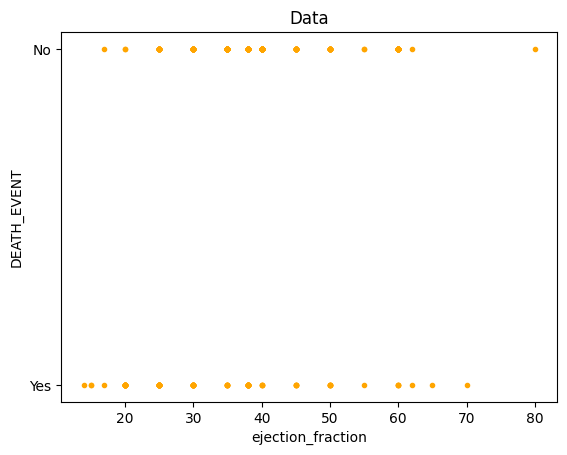

In [100]:
x = df["ejection_fraction"]
y = df["DEATH_EVENT"]

# Plot the data
plt.scatter(x, y, color = "orange", marker=".")

# Add a legend and labels

plt.xlabel("ejection_fraction")
plt.ylabel("DEATH_EVENT")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

In [101]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder Object and transform the Default variable
df["DEATH_EVENT"] = LabelEncoder().fit_transform(df["DEATH_EVENT"])

# Display the 5th first row after transforming
df [["DEATH_EVENT","ejection_fraction"]].head()

,DEATH_EVENT,ejection_fraction
0,1,20
1,1,38
2,1,20
3,1,20
4,1,20


In [112]:
# Create Logit model object
logit_model = smf.logit("DEATH_EVENT ~ ejection_fraction + serum_creatinine", df)

# Fit the model
model_hf = logit_model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_df_coef = print_coef_std_err(model_hf)

results_df_coef

Optimization terminated successfully.
         Current function value: 0.542343
         Iterations 6


,coef,std err
Intercept,0.377693,0.543450
ejection_fraction,-0.059860,0.013496
serum_creatinine,0.749873,0.179336


In [113]:
model_hf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            2
Date:                Sat, 09 Nov 2024   Pseudo R-squ.:                  0.1359
Time:                        03:54:45   Log-Likelihood:                -162.16
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 8.308e-12
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.3777      0.543      0.695      0.487      -0.687       1.443
ejection_fraction    -0.0599      0.013     -4.435      0.000      -0.086      -0.033
serum_creatinine      0.7499      0.179      4.181      0.000       0.398       1.101
=====================================================================================
"""

Unfortunately our model seems to explain little of outcome (death) as seen by pseudo r square. We add interaction variable to improve the model

In [114]:
# Create Logit model object
logit_model = smf.logit("DEATH_EVENT ~ ejection_fraction + serum_creatinine*age", df)

# Fit the model
model_hf_interaction = logit_model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_df_coef_interact = print_coef_std_err(model_hf_interaction)

results_df_coef_interact

Optimization terminated successfully.
         Current function value: 0.510466
         Iterations 6


,coef,std err
Intercept,-2.138542,1.622711
ejection_fraction,-0.069945,0.014230
serum_creatinine,0.509912,1.023449
age,0.048111,0.026522
serum_creatinine:age,0.002591,0.016827


considering the model only have modest increase in pseudo R square with the interaction term included, we decided to drop the interaction variable for better interpretability

In [115]:
model_hf_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            4
Date:                Sat, 09 Nov 2024   Pseudo R-squ.:                  0.1867
Time:                        03:56:49   Log-Likelihood:                -152.63
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 2.173e-14
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.1385      1.623     -1.318      0.188      -5.319       1.042
ejection_fraction       -0.0699      0.014     -4.915      0.000      -0.098      -0.042
serum_creatinine         0.5099      1.023      0.498      0.618      -1.496       2.516
age                      0.0481      0.027      1.814      0.070      -0.004       0.100
serum_creatinine:age     0.0026      0.017      0.154      0.878      -0.030       0.036
========================================================================================
"""

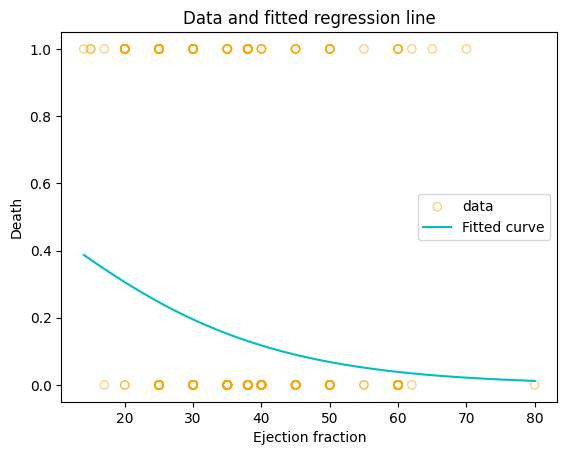

In [116]:
predictor = "ejection_fraction"
outcome = "DEATH_EVENT"
data = df.copy()
results_ = results_df_coef.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], marker= 'o', facecolors = "none", edgecolor="orange", alpha=0.5, label='data')

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

# get values from predictor range
x_range = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 100)

# predicted probabilities of x in x_range
pred_prob = expit(a_hat + b_hat*x_range)

# Plot the fitted line
plt.plot(x_range, pred_prob, label="Fitted curve", color = "c")

# Add a legend and labels
plt.legend()
plt.ylabel("Death")
plt.xlabel("Ejection fraction")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

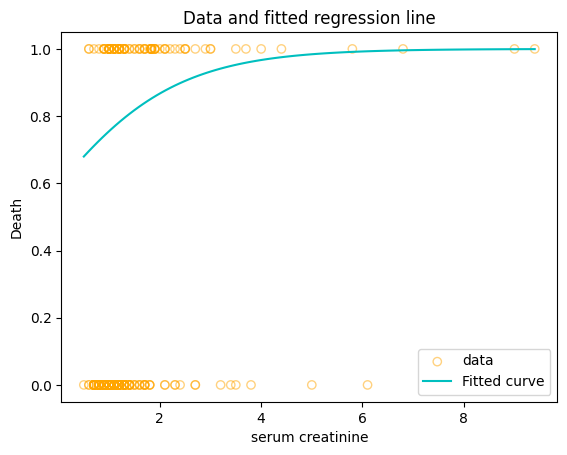

In [117]:
predictor = "serum_creatinine"
outcome = "DEATH_EVENT"
data = df.copy()
results_ = results_df_coef.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], marker= 'o', facecolors = "none", edgecolor="orange", alpha=0.5, label='data')

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

# get values from predictor range
x_range = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 100)

# predicted probabilities of x in x_range
pred_prob = expit(a_hat + b_hat*x_range)

# Plot the fitted line
plt.plot(x_range, pred_prob, label="Fitted curve", color = "c")

# Add a legend and labels
plt.legend()
plt.ylabel("Death")
plt.xlabel("serum creatinine")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

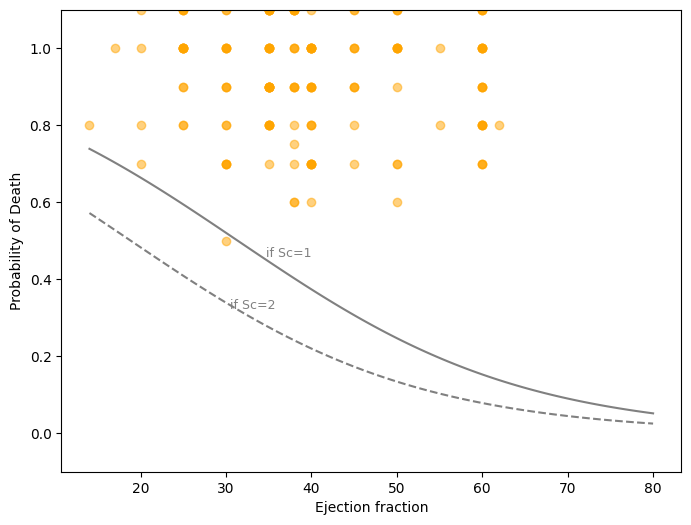

In [118]:
b0_hat = results_df_coef["coef"]["Intercept"]
b1_hat = results_df_coef["coef"]["ejection_fraction"]
b2_hat = results_df_coef["coef"]["serum_creatinine"]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data
ax.scatter(df["ejection_fraction"], df["serum_creatinine"], marker='o', color='orange', alpha=0.5)

# Range of ejection fraction variable
x_range = np.linspace(np.min(df["ejection_fraction"]), np.max(df["ejection_fraction"]),100)

# Plot logistic regression line, given serum creatinine level = 2
ax.plot(x_range, expit(b0_hat + b1_hat*x_range + b2_hat*2), color='gray')

# Plot logistic regression line, given serum creatinine level = 1
ax.plot(x_range, expit(b0_hat + b1_hat*x_range + b2_hat*1), linestyle='--', color='gray')

ax.text(40, 0.45, f" if Sc=1", color='gray', ha='right', va='bottom', fontsize=9)
ax.text(30, 0.35, f" if Sc=2", color='gray', ha='left', va='top', fontsize=9)

ax.set(xlabel='Ejection fraction', ylabel='Probability of Death', ylim=[-0.1, 1.1])

plt.show()

In [119]:
df['DEATH_EVENT'].value_counts()

,count
DEATH_EVENT,
0,203
1,96


In [120]:
results_df_coef

,coef,std err
Intercept,0.377693,0.543450
ejection_fraction,-0.059860,0.013496
serum_creatinine,0.749873,0.179336


$$P(\text{Death}) = \text{logit}^{-1}(-0.37 - 0.05 \cdot \text{ejection_fraction}+ 0.74 \cdot \text {serum_creatinine})$$


From this we can understand if variable serum creatinine is held constant, one change in ejection fraction would result in approximately 0.125%


Ejection fraction usually differs by around 10%

In [121]:
new_ejection_fraction = np.array([20,30])
new_serum_creatinine = np.array([1.2, 1.2])
new_data = pd.DataFrame({
    "ejection_fraction": new_ejection_fraction,
    "serum_creatinine": new_serum_creatinine
})

In [122]:
new_data ["predicted_p_death"] = model_hf.predict(new_data)
new_data

,ejection_fraction,serum_creatinine,predicted_p_death
0,20,1.2,0.520072
1,30,1.2,0.373256


The model predict probability of a person that have 20% ejection fraction is 52% mortality event
In contrast, the predicted probability of mortality event for an individual with a ejection fraction of 30% is lower and equals to 37%

In [123]:
new_ejection_fraction_2 = np.array([20,20])
new_serum_creatinine_2 = np.array([1.2, 1.7])
new_data2 = pd.DataFrame({
    "ejection_fraction": new_ejection_fraction_2,
    "serum_creatinine": new_serum_creatinine_2
})

In [124]:
new_data2 ["predicted_p_death_2"] = model_hf.predict(new_data2)
new_data2

,ejection_fraction,serum_creatinine,predicted_p_death_2
0,20,1.2,0.520072
1,20,1.7,0.611891


The model predict probability of a person that have 1.2 in creatinin level is 52% mortality event.In contrast, the predicted probability of mortality event for an individual with a serum creatinin level of 1.7 is higher and equals to 61%

In [125]:
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression

# Define outcome and features
outcome = "DEATH_EVENT"

# Model 1: Use only 'ejection_fraction'
predictors_1 = ["ejection_fraction"]
X1 = df[predictors_1]
y_true = df[outcome]

# Train the first model
model_1 = LogisticRegression()
model_1.fit(X1, y_true)

# Predict probabilities for Model 1
y_pred_prob_1 = model_1.predict_proba(X1)[:, 1]

# Calculate log-loss for Model 1
logloss_1 = log_loss(y_true, y_pred_prob_1)
print(f'Log-Loss for Model 1 (ejection_fraction only): {logloss_1}')

# Model 2: Use both 'ejection_fraction' and 'serum_creatinine'
predictors_2 = ["ejection_fraction", "serum_creatinine"]
X2 = data[predictors_2]

# Train the second model
model_2 = LogisticRegression()
model_2.fit(X2, y_true)

# Predict probabilities for Model 2
y_pred_prob_2 = model_2.predict_proba(X2)[:, 1]

# Calculate log-loss for Model 2
logloss_2 = log_loss(y_true, y_pred_prob_2)
print(f'Log-Loss for Model 2 (ejection_fraction and serum_creatinine): {logloss_2}')

# Calculate the difference in log-loss
logloss_difference = logloss_1 - logloss_2
print(f'Difference in Log-Loss (Model 1 - Model 2): {logloss_difference}')

Log-Loss for Model 1 (ejection_fraction only): 0.5885756008214987
Log-Loss for Model 2 (ejection_fraction and serum_creatinine): 0.5423706190776195
Difference in Log-Loss (Model 1 - Model 2): 0.046204981743879214


In conclusion, from t test there is reciprocal relationship between creatinine and death. For ejection fraction, the relationship is inverse.

For logistic regression, negative coefficient indicates that higher ejection fraction lower probability of death
To be precise, a one-unit change in ejection fraction is associated with a negative difference odds of death by 0.05 units.
Using divide by 4 rule:
1 unit more in ejection fraction corresponds to an approximately 0.125% (0.5/4) negative difference in probability of death

On the other hand for creatinine, one unit change of serum creatinine is associated with positive difference odds od death by 0.74. 1 unit change in serum creatinine corresponds to 0.185 positive difference in probability of death


Business
Since ejection fraction and creatinine is a significant predictor, patients with low ejection fraction and increased creatinine could be monitored more. Programs aimed at heart function improvement could potentially reduce mortality risk. Or in hospital with less capability of intensive monitoring, both of these predictors would mean to refer early

limitation
The model has limited explanatory power

Future studies
Future studies could collect medical charges and severity of disease  to see if variables correlate with both of those variables